# <center>MNIST: SIMPLE Machine Learning Algorithms<center>
<hr>

## 1. Introduction

In [1]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.listdir("../input"))

['sample_submission.csv', 'train.csv', 'test.csv']


In [3]:
# Set our train and test date
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# data size
train_df.shape

(42000, 785)

In [6]:
# show digits distribution
train_df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

**Class distribution looks balanced which is great to continue into modeling part.**

In [7]:
# Set features and label for showing
digits = train_df.drop(['label'], 1).values
digits = digits / 255.
label = train_df['label'].values

digits.max(), label.max()

(1.0, 9)

**Normize data (/ 255.) isnot necessary with tree based model, but we will keep in case apply new algorithms in the future.**

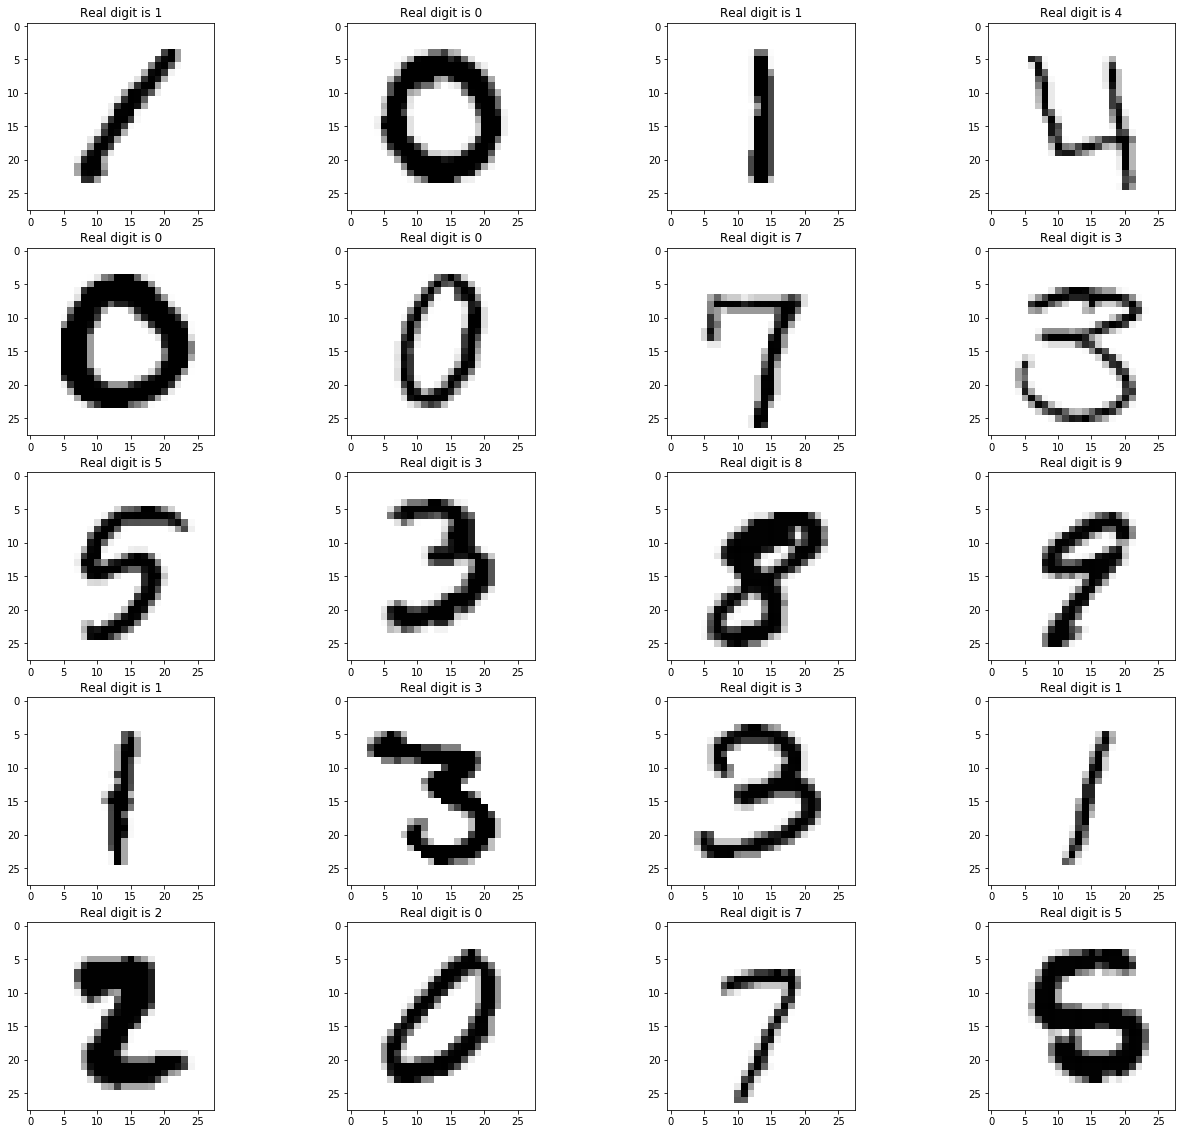

In [8]:
# Show 25 digits of data
fig, axis = plt.subplots(5, 4, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(digits[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Real digit is {}".format(label[i]))

# 2. Machine Learning

In [9]:
# Machine Learning
from sklearn.model_selection import train_test_split

# models
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

In [10]:
# Set X, y for fiting
X = digits
y = label

# split data into 90% training and 10% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## 2.1 Random Forest Classifier Model

In [11]:
# Seting our model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
y_pred = model.predict(X_test) # predict our file test data
rf_acc = accuracy_score(y_test, y_pred)

print("Model accuracy is: {0:.3f}%".format(rf_acc * 100))

Model accuracy is: 94.238%


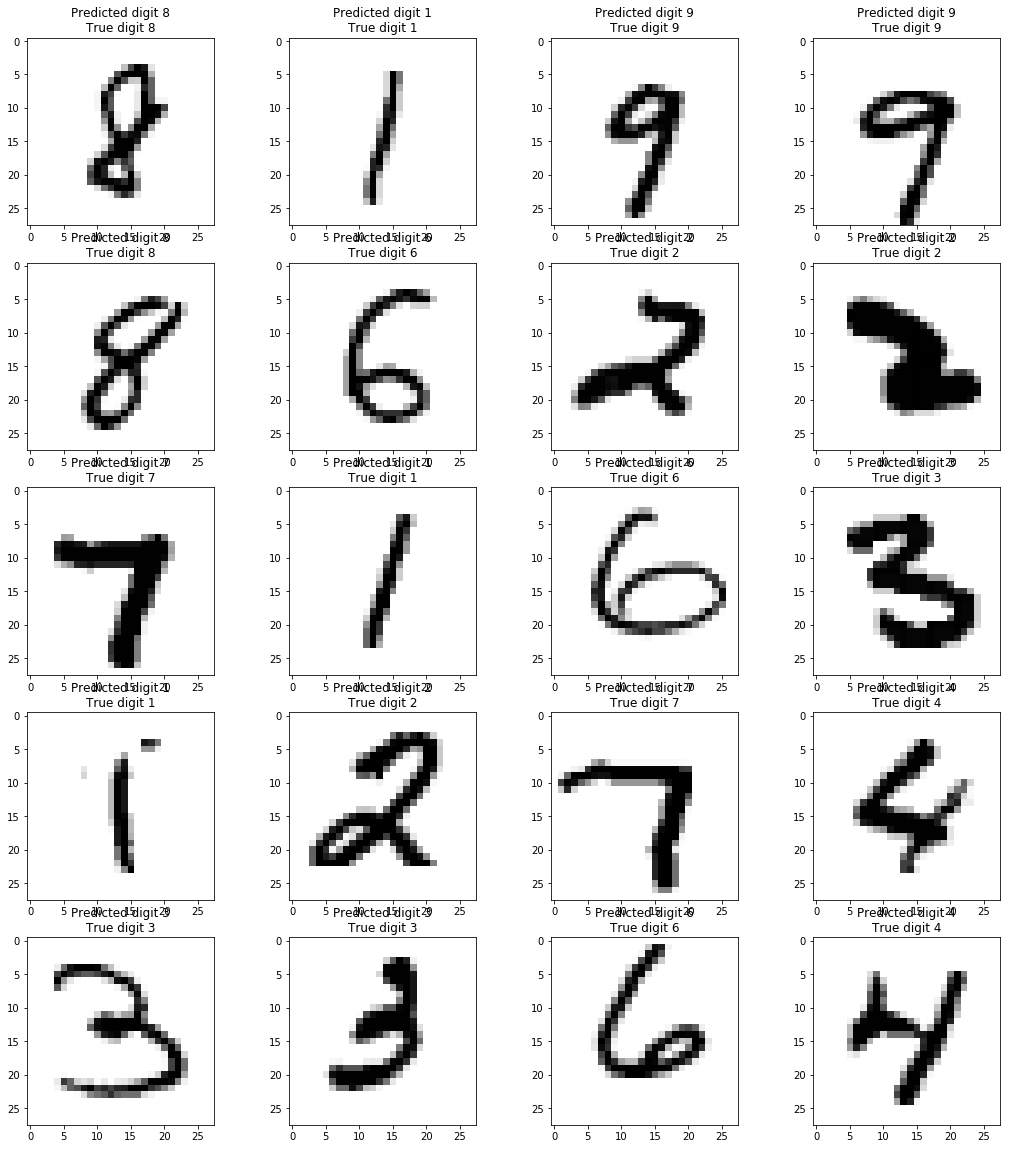

In [13]:
# Compare our result
fig, axis = plt.subplots(5, 4, figsize=(18, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(y_pred[i], y_test[i]))

### Confusion Matrix

In [14]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([408, 471, 420, 506, 397, 339, 402, 438, 403, 416]))

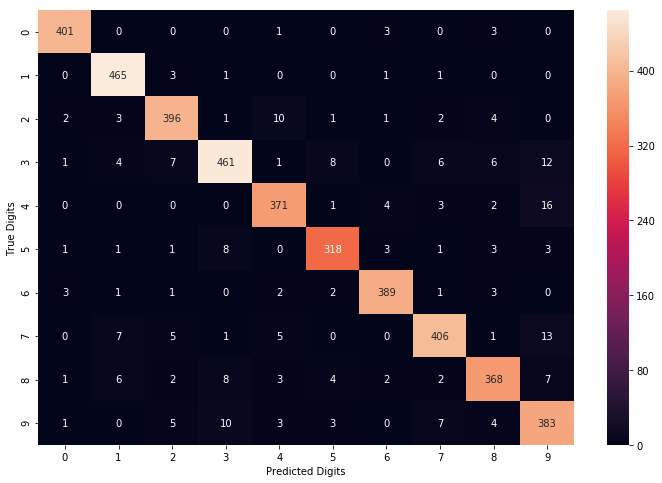

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

* Class/Digit 5 was predicted more false than other digits. 
* Digit 9 has a big interaction with digits 7, 4 and 3.

We could try to tune the RF hyperparameters to improve the model predictions.

## 2.2 Different algorithms

Try different algorithms for multiclass classification problem like (KNN, naive bayes) 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [17]:
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test) # predict our file test data
# knn_acc = accuracy_score(y_test, y_pred)

# print("KNN accuracy is: {0:.3f}%".format(knn_acc * 100))

In [18]:
gnb = MultinomialNB(alpha=1e-3)
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test) # predict our file test data
gnb_acc = accuracy_score(y_test, y_pred)

print("NB accuracy is: {0:.3f}%".format(gnb_acc * 100))

NB accuracy is: 81.929%


## Submission

In [19]:
test_X = test_df.values / 255.
rfc_pred = model.predict(test_X)
gnb_pred = gnb.predict(test_X)

In [20]:
sub = pd.read_csv('../input/sample_submission.csv')
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [21]:
# Make submission file
sub['Label'] = rfc_pred
sub.to_csv('submission.csv', index=False)

In [22]:
# Make NB submission file
sub['Label'] = gnb_pred
sub.to_csv('GNB_submission.csv', index=False)

In [23]:
# Show our submission file
sub.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
